In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage
# from skimage.data import imread
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [3]:
print(os.listdir("airbus-ship-detection"))

['input', 'src']


In [6]:
os.getcwd()

'D:\\PyTorch\\Airbus_Image_Segmentation'

In [7]:
train = os.listdir('airbus-ship-detection/input/train_v2')
print(len(train))

test = os.listdir('airbus-ship-detection/input/test_v2')
print(len(test))

192556
15606


In [8]:
submission = pd.read_csv('airbus-ship-detection/input/sample_submission_v2.csv')
submission.head()

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2


In [57]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return (img.reshape(shape).T) # Needed to align to RLE direction

In [58]:
masks = pd.read_csv('airbus-ship-detection/input/train_ship_segmentations_v2.csv')
masks.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


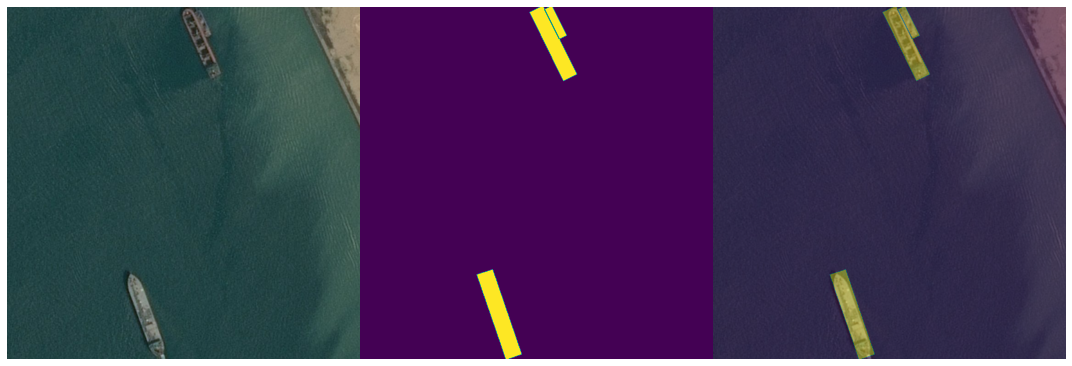

In [161]:
ImageId = '00abc623a.jpg'

img = skimage.io.imread('airbus-ship-detection/input/train_v2/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

In [168]:
img.shape, all_masks.shape,
img = torch.Tensor(img)
all_masks = torch.Tensor(all_masks)
all_masks = all_masks.unsqueeze(2)

In [169]:
all_masks.shape, img.shape

(torch.Size([768, 768, 1]), torch.Size([768, 768, 3]))

In [156]:
import torch
img = np.reshape(img, (img.shape[2], img.shape[1], -1))
img = torch.Tensor(img)
all_masks = torch.Tensor(all_masks)
all_masks = all_masks.unsqueeze(0)
img.shape, all_masks.shape

(torch.Size([3, 768, 768]), torch.Size([1, 768, 768]))

In [166]:
img2 = np.reshape(img, (img.shape[1], img.shape[2], img.shape[0]))
img2.shape,img.shape

((768, 3, 768), (768, 768, 3))

In [155]:
import torchvision
rect = torchvision.transforms.RandomCrop.get_params(img, (400, 400))
feature = torchvision.transforms.functional.crop(img, *rect)
label = torchvision.transforms.functional.crop(all_masks, *rect)  

TypeError: Unexpected type <class 'numpy.ndarray'>

In [170]:
import torchvision
rect = torchvision.transforms.Resize((300, 300,))
feature = rect(img)
label = rect(all_masks) 

In [171]:
img.shape, feature.shape, label.shape

(torch.Size([768, 768, 3]),
 torch.Size([768, 300, 300]),
 torch.Size([768, 300, 300]))

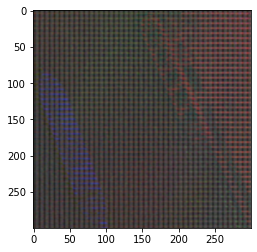

In [159]:
plt.imshow(feature.permute(1,2,0)/ 255.)

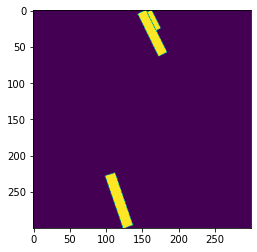

In [160]:
plt.imshow(label.permute(1,2,0)/ 255.)

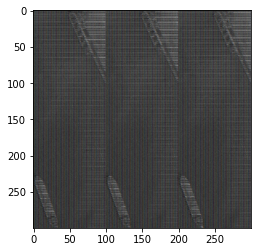

In [132]:
plt.imshow(torch.reshape(img, (img.shape[1], img.shape[2], -1)) /255.)

In [94]:
img.shape

torch.Size([3, 768, 768])